In [25]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import tqdm

In [21]:
class DistributionError(Exception):
    pass
def SNR(distribution,T_array,extra_args=dict()):
    '''
    Function to calculate SNR v/s observation time T. 
    '''
    Y_samples=1000 #No. of samples that we average over
    if distribution=="Constant" or distribution=='constant':
        h=extra_args['h']
        Y_arrays=[]
        for i in range(Y_samples):
            Y=[]
            n1=np.random.normal(0,1,len(T_array))
            n2=np.random.normal(0,1,len(T_array))
            for ii in range(len(T_array)):
                if ii==0:
                    Y.append((n1[ii]+h)*(n2[ii]+h))
                else:
                    Y.append(Y[-1]+(n1[ii]+h)*(n2[ii]+h))
            Y_arrays.append(Y)
    elif distribution=="Gaussian" or distribution=='gaussian':
        hmean=extra_args['hmean']
        hstdev=extra_args['hstdev']
        Y_arrays=[]
        for i in range(Y_samples):
            Y=[]
            n1=np.random.normal(0,1,len(T_array))
            n2=np.random.normal(0,1,len(T_array))
            ht=np.random.normal(hmean,hstdev,len(T_array))
            for ii in range(len(T_array)):
                if ii==0:
                    Y.append((n1[ii]+ht[ii])*(n2[ii]+ht[ii]))
                else:
                    Y.append(Y[-1]+(n1[ii]+ht[ii])*(n2[ii]+ht[ii]))
            Y_arrays.append(Y)
    else:
        raise DistributionError("Distribution not recognized") 
    Y_arrays=np.array(Y_arrays)        
    Average_Y=Y_arrays.mean(axis=0)
    stdev_Y=Y_arrays.std(axis=0)
    SNR=Average_Y/stdev_Y   
    return SNR

In [22]:
T_array=np.linspace(0,200000,200000)
SNR_const_case = SNR('Constant',T_array,extra_args=dict(h=0.1),)

In [23]:
SNR_Gaussian_case = SNR('Gaussian',T_array,extra_args=dict(hmean=0,hstdev=0.1),)

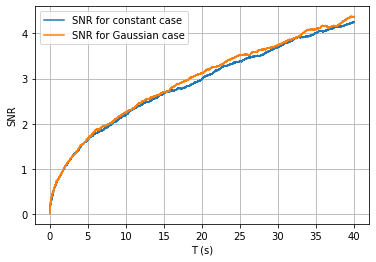

In [24]:
T_array=np.linspace(0,200000,200000)
delta_t=2e-4
T_array=T_array*delta_t
plt.plot(T_array,SNR_const_case,label='SNR for constant case')
plt.plot(T_array,SNR_Gaussian_case,label='SNR for Gaussian case')
plt.xlabel('T (s)')
plt.ylabel('SNR')
plt.legend(loc='best')
plt.grid()